In [3]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 KB 1.3 MB/s eta 0:00:001.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 7.0 MB/s eta 0:00:00


In [441]:
from geopy.geocoders import Nominatim

def get_lat_lng(city_name):
    geolocator = Nominatim(user_agent="your_app_name")  # Replace "your_app_name" with your own user agent

    try:
        location = geolocator.geocode(city_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None


In [442]:
city_name = "Skegness"
coordinates = get_lat_lng(city_name)

url =''

if coordinates:
    latitude, longitude = coordinates
    url = f"http://localhost:5000/getVesselsNearMe/{latitude}/{longitude}/50"
    print(f"http://localhost:5000/getVesselsNearMe/{latitude}/{longitude}/20")
else:
    print(f"Could not find the coordinates for {city_name}")


http://localhost:5000/getVesselsNearMe/53.1437506/0.3428958/20


In [443]:
import requests

def get_json_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for any non-successful status codes

        json_data = response.json()
        return json_data
    except requests.exceptions.RequestException as e:
        print(f"Error occurred: {str(e)}")
        return None
    



In [444]:
data = get_json_from_url(url)

In [445]:
len(data)

195

In [446]:
data

[{'name': 'WADOWICE II',
  'id': '372940',
  'lat': 53.63949,
  'lon': 0.8527684,
  'timestamp': 1684248739,
  'mmsi': '311024300',
  'imo': '9488102',
  'callsign': 'C6XW7',
  'speed': 9.9,
  'area': 'UKC - UK Coast & Atlantic',
  'type': 'Cargo',
  'country': 'Bahamas',
  'destination': 'TEESPORT',
  'port_current_id': None,
  'port_current': None,
  'port_next_id': '149',
  'port_next': 'TEES'},
 {'name': 'MANISA KRISTIN',
  'id': '268400',
  'lat': 53.74475,
  'lon': -0.2739917,
  'timestamp': 1684248739,
  'mmsi': '246432000',
  'imo': '9190212',
  'callsign': 'PCIK',
  'speed': 0,
  'area': 'UKC - UK Coast & Atlantic',
  'type': 'Cargo',
  'country': 'Netherlands',
  'destination': 'NL BEV',
  'port_current_id': '146',
  'port_current': 'HULL',
  'port_next_id': '1786',
  'port_next': 'BEVERWIJK'},
 {'name': 'BIMI',
  'id': '376292',
  'lat': 53.71676,
  'lon': -0.24436,
  'timestamp': 1684248738,
  'mmsi': '258681000',
  'imo': '8914295',
  'callsign': 'LAXO7',
  'speed': 8.7,
 

In [447]:
len(data)

195

In [195]:
def sort_json_by_timestamp(data):
    sorted_json = sorted(data, key=lambda x: x['timestamp'], reverse=True)
    return sorted_json

In [196]:
sort_json_by_timestamp(data)

[{'name': 'COAST GUARD SOUT',
  'id': '4945525',
  'lat': 44.55165,
  'lon': -63.51085,
  'timestamp': 1684236854,
  'mmsi': '993166012',
  'imo': '0',
  'callsign': '',
  'speed': 0,
  'area': 'ECCAN - East Coast Canada',
  'type': 'Navigation Aid',
  'country': 'Canada',
  'destination': None,
  'port_current_id': None,
  'port_current': None,
  'port_next_id': None,
  'port_next': None},
 {'name': 'COAST GUARD WEST 1',
  'id': '4945524',
  'lat': 44.55582,
  'lon': -63.51667,
  'timestamp': 1684236854,
  'mmsi': '993166013',
  'imo': '0',
  'callsign': '',
  'speed': 0,
  'area': 'ECCAN - East Coast Canada',
  'type': 'Navigation Aid',
  'country': 'Canada',
  'destination': None,
  'port_current_id': None,
  'port_current': None,
  'port_next_id': None,
  'port_next': None},
 {'name': 'COAST GUARD EAS',
  'id': '4945523',
  'lat': 44.55582,
  'lon': -63.50501,
  'timestamp': 1684236853,
  'mmsi': '993166010',
  'imo': '0',
  'callsign': '',
  'speed': 0,
  'area': 'ECCAN - East Coa

In [197]:
import datetime

def timestamp_to_datetime(timestamp):
    try:
        dt = datetime.datetime.fromtimestamp(timestamp)
        print(f"Datetime: {dt}")
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None


In [198]:
timestamp_to_datetime(1684235420)



Datetime: 2023-05-16 14:10:20


In [199]:
def get_unique_types(json_data):
    unique_types = set()
    for item in json_data:
        unique_types.add(item['type'])
    return unique_types


In [200]:
get_unique_types(data)

{'Cargo',
 'Fishing',
 'Navigation Aid',
 'Other',
 'Passenger',
 'Pleasure Craft',
 'Sailing Vessel',
 'Search and Rescue',
 'Special Craft',
 'Tug',
 'VTS'}

In [439]:
import json

def remove_duplicates_by_userid(json_file_path):
    # Load data from JSON file
    with open(json_file_path, "r") as json_file:
        data = json.load(json_file)

    # Create a dictionary to track unique UserIDs
    unique_userids = {}

    # Iterate over the data entries
    deduplicated_data = []
    for entry in data:
        userid = entry["AIS Message"]["UserID"]
        # Check if the UserID is already present in the dictionary
        if userid not in unique_userids:
            # Add the entry to the deduplicated data
            deduplicated_data.append(entry)
            # Add the UserID to the dictionary
            unique_userids[userid] = True

    # Write the deduplicated data back to the JSON file
    with open(json_file_path, "w") as json_file:
        json.dump(deduplicated_data, json_file, indent=4)

    print("Duplicates removed from the JSON file.")

In [440]:
file_path = '/home/socrates/Desktop/aisStream/ais_data.json'

remove_duplicates_by_userid(file_path)

JSONDecodeError: Expecting ',' delimiter: line 916758 column 27 (char 25302009)

In [437]:
import json

def import_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data


json_data = import_json_file(file_path)

In [438]:
len(json_data)

14030

In [433]:
json_data

[{'AIS Message': {'AisVersion': 2,
   'CallSign': '',
   'Destination': '',
   'Dimension': {'A': 11, 'B': 10, 'C': 2, 'D': 3},
   'Dte': False,
   'Eta': {'Day': 0, 'Hour': 24, 'Minute': 60, 'Month': 0},
   'FixType': 15,
   'ImoNumber': 0,
   'MaximumStaticDraught': 0,
   'MessageID': 5,
   'Name': 'CONSTANTIA FORMENTOR',
   'RepeatIndicator': 0,
   'Spare': False,
   'Type': 0,
   'UserID': 225019990,
   'Valid': True},
  'Latitude': 39.55974833333333,
  'Longitude': 2.6273583333333335,
  'Time': '2023-05-16 14:23:37.03683734 +0000 UTC'},
 {'AIS Message': {'AisVersion': 2,
   'CallSign': 'PA2812',
   'Destination': 'AMST',
   'Dimension': {'A': 20, 'B': 14, 'C': 5, 'D': 4},
   'Dte': False,
   'Eta': {'Day': 0, 'Hour': 24, 'Minute': 60, 'Month': 0},
   'FixType': 15,
   'ImoNumber': 0,
   'MaximumStaticDraught': 0,
   'MessageID': 5,
   'Name': 'IJVEER 62',
   'RepeatIndicator': 0,
   'Spare': False,
   'Type': 69,
   'UserID': 244060118,
   'Valid': True},
  'Latitude': 52.39500166

In [434]:
import json
import matplotlib.pyplot as plt

def plot_latitude_longitude(json_file_path):
    # Load data from JSON file
    with open(file_path, "r") as json_file:
        data = json.load(json_file)

    # Extract latitude and longitude values
    latitudes = [entry["Latitude"] for entry in data]
    longitudes = [entry["Longitude"] for entry in data]

    # Create scatter plot
    plt.scatter(longitudes, latitudes)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Latitude and Longitude Points")

    # Display the plot
    plt.show()


In [435]:
plot_latitude_longitude(file_path)

JSONDecodeError: Expecting value: line 2079 column 17 (char 57310)

/tmp/ipykernel_16055/2664849133.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


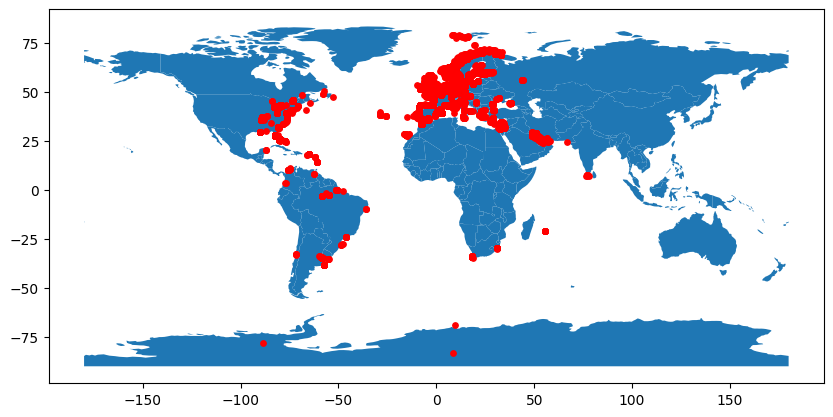

In [436]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Read JSON file into a DataFrame
df = pd.read_json(file_path, orient='records')

# Create Point geometries from longitude and latitude columns
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Create a GeoDataFrame from the DataFrame and geometry
gdf = GeoDataFrame(df, geometry=geometry)

# Create a map using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

# Display the map
plt.show()


In [388]:
!pip3 install geopandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 37.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 45.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [ ]:
32864804aa79bc05381996a688d91dc259ea42e5

In [268]:
import asyncio
import websockets
import json
from datetime import datetime, timezone

async def connect_ais_stream():
    async with websockets.connect('wss://stream.aisstream.io/v0/stream') as websocket:
        subscribe_message = {"APIKey": "apikey", "BoundingBoxes": [[[-90, -180], [90, 180]]]}
        subscribe_message_json = json.dumps(subscribe_message)
        await websocket.send(subscribe_message_json)

        async for message_json in websocket:
            message = json.loads(message_json)
            message_type = message["MessageType"]

            if message_type == "PositionReport":
                ais_message = message['Message']['PositionReport']
                print(f"[{datetime.now(timezone.utc)}] ShipID: {ais_message['UserID']} Latitude: {ais_message['Latitude']} Longitude: {ais_message['Longitude']}")

# Create an event loop
loop = asyncio.get_event_loop()

# Run the connect_ais_stream() function within the event loop
loop.create_task(connect_ais_stream())

# Keep the event loop running
# loop.run_forever()


<Task pending name='Task-6' coro=<connect_ais_stream() running at /tmp/ipykernel_16055/2701442985.py:6>>

In [265]:
connect_ais_stream()

<coroutine object connect_ais_stream at 0x7f6ef4aab140>

In [ ]:
const WebSocket

In [220]:
######################

In [249]:
import requests

def get_all_cities():
    url = 'http://download.geonames.org/export/dump/cities15000.zip'  # URL for the GeoNames cities database
    response = requests.get(url)

    # Assuming the file is a zipped archive, you can extract it using appropriate libraries like zipfile
    # Here's an example of how to extract the file using the zipfile module:
    import zipfile
    import io

    with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
        zip_ref.extractall('cities_data')

    # Assuming the extracted file is a text file containing city data (e.g., cities15000.txt)
    # You can open the file and read the city names, latitudes, longitudes, and population
    cities = []

    with open('cities_data/cities15000.txt', 'r', encoding='utf-8') as file:
        for line in file:
            data = line.split('\t')
            city_name = data[1]
            latitude = float(data[4])
            longitude = float(data[5])
            population = int(data[14])
            cities.append((city_name, latitude, longitude, population))  # Append a tuple of city name, latitude, longitude, and population

    return cities

# Call the function to retrieve the list of cities with latitude, longitude, and population
city_list = get_all_cities()

# Print the first 10 cities with latitude, longitude, and population as an example
for city, latitude, longitude, population in city_list[:10]:
    print(f"City: {city}, Latitude: {latitude}, Longitude: {longitude}, Population: {population}")


City: les Escaldes, Latitude: 42.50729, Longitude: 1.53414, Population: 15853
City: Andorra la Vella, Latitude: 42.50779, Longitude: 1.52109, Population: 20430
City: Umm Al Quwain City, Latitude: 25.56473, Longitude: 55.55517, Population: 62747
City: Ras Al Khaimah City, Latitude: 25.78953, Longitude: 55.9432, Population: 351943
City: Zayed City, Latitude: 23.65416, Longitude: 53.70522, Population: 63482
City: Khawr Fakkān, Latitude: 25.33132, Longitude: 56.34199, Population: 40677
City: Dubai, Latitude: 25.07725, Longitude: 55.30927, Population: 3478300
City: Dibba Al-Fujairah, Latitude: 25.59246, Longitude: 56.26176, Population: 30000
City: Dibba Al-Hisn, Latitude: 25.61955, Longitude: 56.27291, Population: 26395
City: Sharjah, Latitude: 25.33737, Longitude: 55.41206, Population: 1274749


In [250]:
len(city_list)

26462

In [251]:
city_list

[('les Escaldes', 42.50729, 1.53414, 15853),
 ('Andorra la Vella', 42.50779, 1.52109, 20430),
 ('Umm Al Quwain City', 25.56473, 55.55517, 62747),
 ('Ras Al Khaimah City', 25.78953, 55.9432, 351943),
 ('Zayed City', 23.65416, 53.70522, 63482),
 ('Khawr Fakkān', 25.33132, 56.34199, 40677),
 ('Dubai', 25.07725, 55.30927, 3478300),
 ('Dibba Al-Fujairah', 25.59246, 56.26176, 30000),
 ('Dibba Al-Hisn', 25.61955, 56.27291, 26395),
 ('Sharjah', 25.33737, 55.41206, 1274749),
 ('Ar Ruways', 24.11028, 52.73056, 25000),
 ('Al Fujairah City', 25.11641, 56.34141, 86512),
 ('Al Ain City', 24.19167, 55.76056, 846747),
 ('Ajman City', 25.40177, 55.47878, 490035),
 ('Adh Dhayd', 25.28812, 55.88157, 20165),
 ('Abu Dhabi', 24.45118, 54.39696, 603492),
 ('Khalifah A City', 24.42588, 54.605, 85374),
 ('Bani Yas City', 24.30978, 54.62944, 80498),
 ('Musaffah', 24.35893, 54.48267, 243341),
 ('Al Shamkhah City', 24.39268, 54.70779, 61710),
 ('Reef Al Fujairah City', 25.14479, 56.24764, 82310),
 ('Zaranj', 30.9

In [253]:
26462 / 60 / 60

7.350555555555556